In [1]:
from google.colab import drive
drive.mount("/content/drive")
#veri dosyalarını eklemek için link

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded=files.upload()
#dosyaları eklemek içi

Saving air-traffic-passenger-statistics.csv to air-traffic-passenger-statistics.csv


In [3]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
Tablo=pn.read_csv('air-traffic-passenger-statistics.csv')

In [5]:
Tablo.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [6]:
Tablo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [7]:
Tablo['Operating Airline'].value_counts()

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Pacific Aviation                       2
Icelandair EHF                         2
Evergreen International Airlines       2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

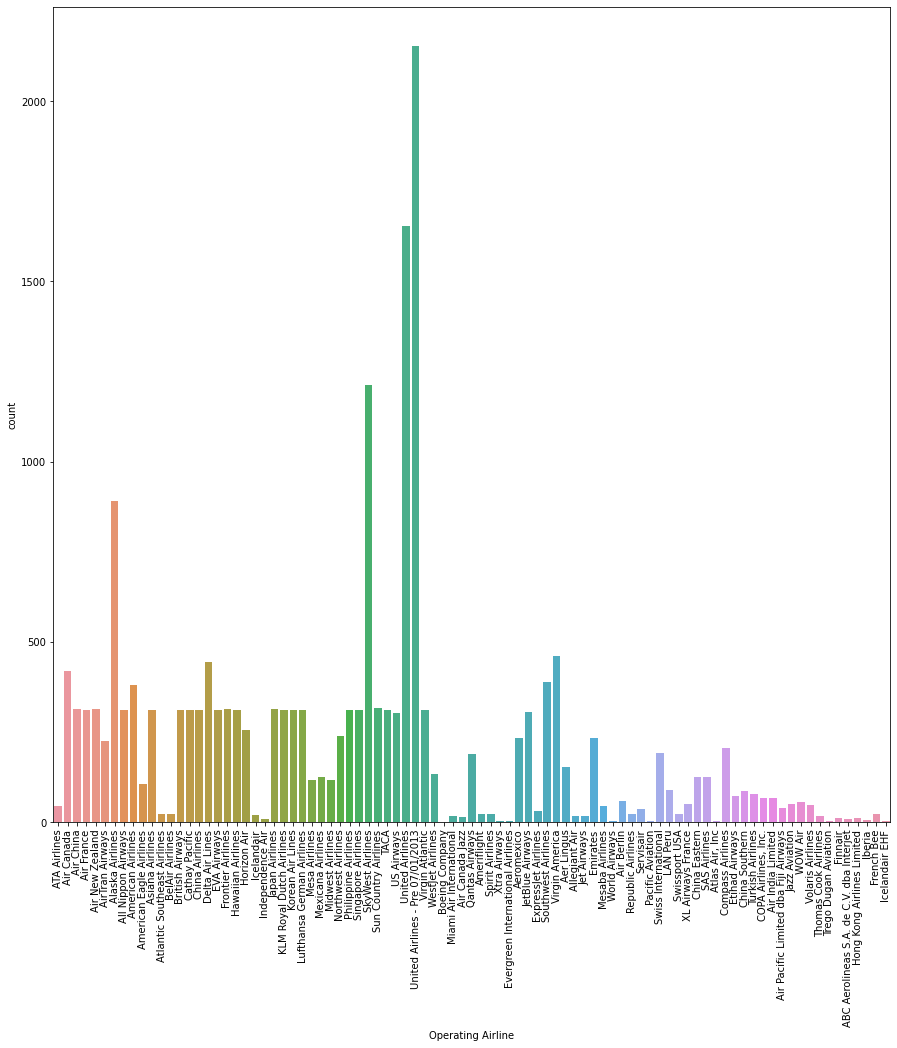

In [8]:
plt.figure(figsize=(15,15))
sbn.countplot(x=Tablo['Operating Airline'])
plt.xticks(rotation=90);

In [9]:
Tablo.groupby('Operating Airline').sum().sort_values('Passenger Count',ascending=False).head()

,Activity Period,Passenger Count
Operating Airline,,
United Airlines,333084464,112640408
United Airlines - Pre 07/01/2013,432726093,105363917
SkyWest Airlines,243868126,44582356
American Airlines,76473256,43622387
Virgin America,93003585,37843920


In [10]:
airlines=Tablo['Operating Airline'].value_counts()
airlines=airlines.sort_index()
airlines

ABC Aerolineas S.A. de C.V. dba Interjet      8
ATA Airlines                                 44
Aer Lingus                                  152
Aeromexico                                  234
Air Berlin                                   60
                                           ... 
WOW Air                                      56
WestJet Airlines                            135
World Airways                                 3
XL Airways France                            51
Xtra Airways                                  2
Name: Operating Airline, Length: 89, dtype: int64

In [11]:
Tablo.groupby('Operating Airline').sum().head()

,Activity Period,Passenger Count
Operating Airline,,
ABC Aerolineas S.A. de C.V. dba Interjet,1614436,15585
ATA Airlines,8825800,384764
Aer Lingus,30604386,777691
Aeromexico,47108898,1672946
Air Berlin,12079650,235155


In [12]:
passenger=Tablo.groupby('Operating Airline').sum()['Passenger Count']
passenger

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      15585
ATA Airlines                                 384764
Aer Lingus                                   777691
Aeromexico                                  1672946
Air Berlin                                   235155
                                             ...   
WOW Air                                      295168
WestJet Airlines                             799801
World Airways                                   785
XL Airways France                            118961
Xtra Airways                                    146
Name: Passenger Count, Length: 89, dtype: int64

In [13]:
x=airlines.values
y=passenger.values

In [14]:
x.shape,y.shape

((89,), (89,))

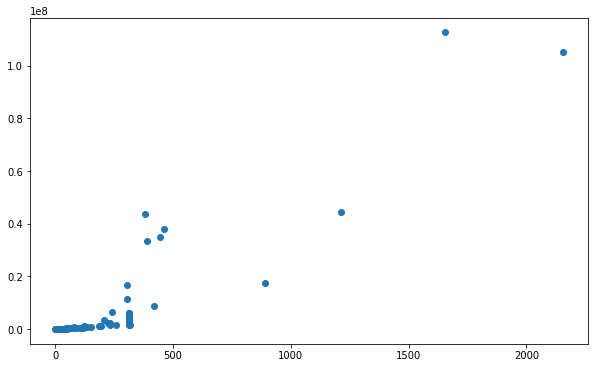

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)

In [16]:
X={'Airlines_count':x,'Passenger_count':y}
X=pn.DataFrame(X)
X

,Airlines_count,Passenger_count
0,8,15585
1,44,384764
2,152,777691
3,234,1672946
4,60,235155
...,...,...
84,56,295168
85,135,799801
86,3,785
87,51,118961


In [17]:
allscore=[]
allclusters=[]
sum_of_squared=[]
def clust(clusters):
  for no_of_cluster in np.arange(1,clusters):
    no_of_cluster+=1                      # kümelenme için en az iki gruba ihtiyaç olduğunu belirtmek içn yaptım  arange(2,clusters) olacak
    model=KMeans(n_clusters=no_of_cluster)
    pred=model.fit_predict(X)
    sum_of_squared.append(model.inertia_)
    score=silhouette_score(X,pred)
    print('number of cluster:{}, silhouette:{}'.format(no_of_cluster-1,score))
    allscore.append(score)
    allclusters.append(no_of_cluster)
clust(10)  # 4 grup en iyisi

number of cluster:1, silhouette:0.9286008999043343
number of cluster:2, silhouette:0.9124445056983075
number of cluster:3, silhouette:0.8270891141738362
number of cluster:4, silhouette:0.7267852090532811
number of cluster:5, silhouette:0.7269693507973984
number of cluster:6, silhouette:0.7255445980469641
number of cluster:7, silhouette:0.7392361962022945
number of cluster:8, silhouette:0.7192917541572154
number of cluster:9, silhouette:0.7107647583653071


In [18]:
model=KMeans(n_clusters=4)
pred=model.fit_predict(X)
pred

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [19]:
X['cluster']=pred
X.sample(7)

,Airlines_count,Passenger_count,cluster
53,90,250741,0
49,16,68485,0
84,56,295168,0
38,24,15752,0
40,312,2992406,0
28,126,866539,0
32,312,4387370,0


No handles with labels found to put in legend.


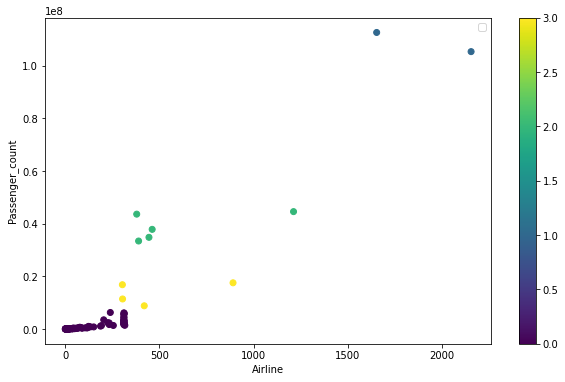

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X.Airlines_count,X.Passenger_count,c=pred)
plt.ylabel('Passenger_count')
plt.xlabel('Airline')
plt.legend()
plt.colorbar()
plt.show()

(0.0, 15.0)

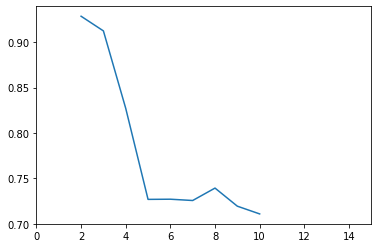

In [21]:
plt.plot(allclusters,allscore)
plt.xlim(0,15)

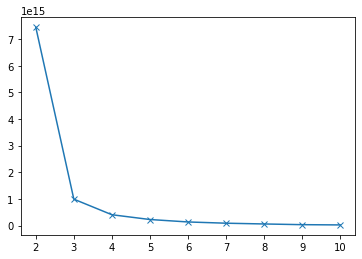

In [22]:
plt.plot(allclusters,sum_of_squared,marker='x')

In [23]:
# En çok yolcu getirenleri gruplara ayırdık
# sırada En çok uçuş seferi yapanda

In [24]:
Tablo.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [25]:
Tablo

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804


In [89]:
Tablo['Operating Airline'].value_counts().index

Index(['United Airlines - Pre 07/01/2013', 'United Airlines',
       'SkyWest Airlines', 'Alaska Airlines', 'Virgin America',
       'Delta Air Lines', 'Air Canada', 'Southwest Airlines',
       'American Airlines', 'Sun Country Airlines', 'Frontier Airlines',
       'Air China', 'Air New Zealand', 'Japan Airlines', 'Singapore Airlines',
       'China Airlines', 'EVA Airways', 'Asiana Airlines', 'Korean Air Lines',
       'TACA', 'Air France', 'Hawaiian Airlines', 'British Airways',
       'Cathay Pacific', 'Philippine Airlines', 'Virgin Atlantic',
       'All Nippon Airways', 'KLM Royal Dutch Airlines',
       'Lufthansa German Airlines', 'JetBlue Airways', 'US Airways',
       'Horizon Air', 'Northwest Airlines', 'Aeromexico', 'Emirates',
       'AirTran Airways', 'Compass Airlines', 'Swiss International',
       'Qantas Airways', 'Aer Lingus', 'WestJet Airlines', 'SAS Airlines',
       'China Eastern', 'Mexicana Airlines', 'Mesa Airlines',
       'Midwest Airlines', 'American Eagle 

In [57]:
Tablo['Operating Airline'].value_counts()

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Pacific Aviation                       2
Icelandair EHF                         2
Evergreen International Airlines       2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

In [66]:
y1=Tablo['Operating Airline'].value_counts().values
x1=Tablo['Operating Airline'].value_counts().index

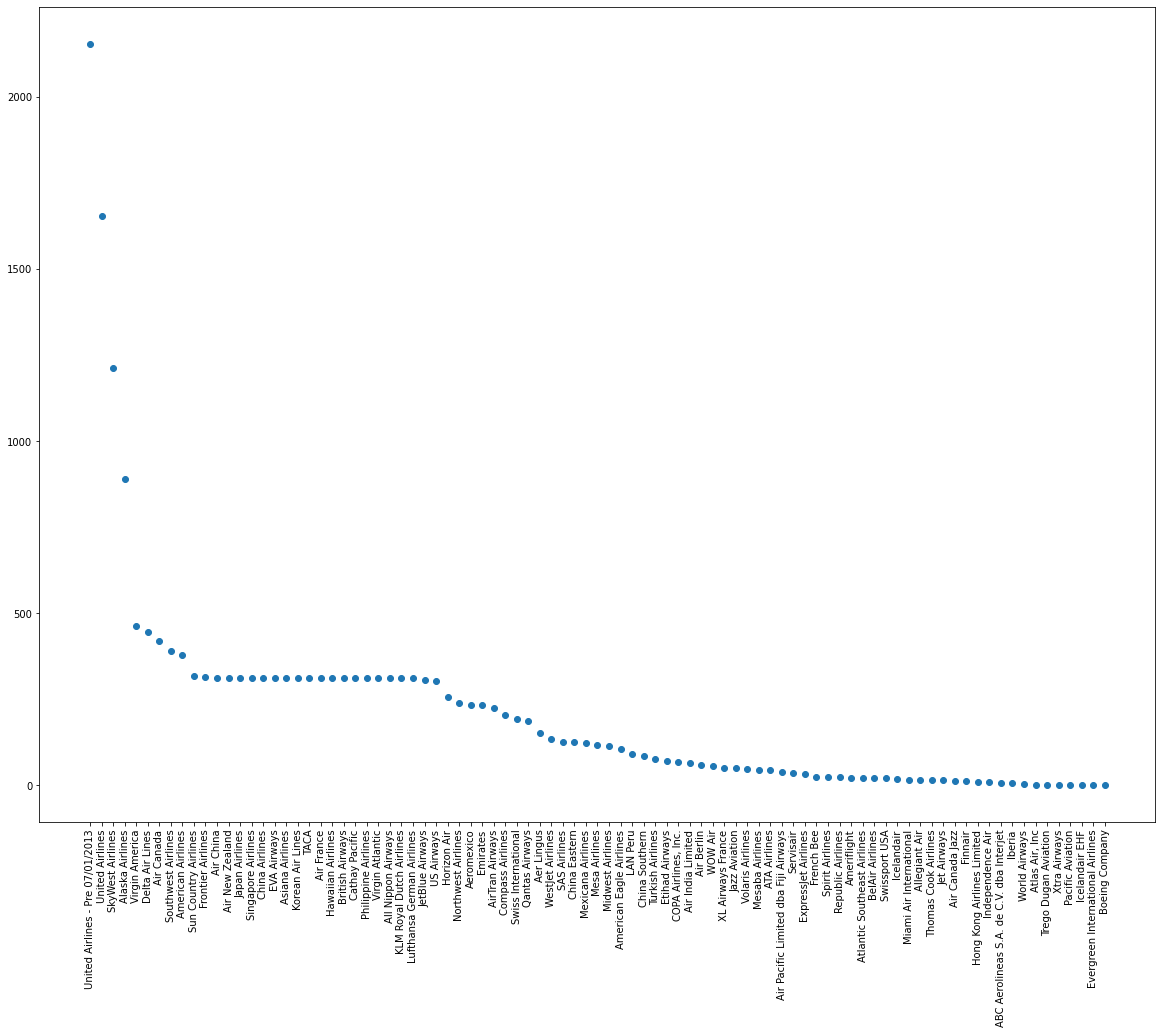

In [70]:
plt.figure(figsize=(20,15))
plt.scatter(x1,y1)
plt.xticks(rotation=90);

In [80]:
X={'flight expedition':y1,'Airlines':x1}
X=pn.DataFrame(X)
X=pn.get_dummies(X,drop_first=True)
X

,flight expedition,Airlines_ATA Airlines,Airlines_Aer Lingus,Airlines_Aeromexico,Airlines_Air Berlin,Airlines_Air Canada,Airlines_Air Canada Jazz,Airlines_Air China,Airlines_Air France,Airlines_Air India Limited,Airlines_Air New Zealand,Airlines_Air Pacific Limited dba Fiji Airways,Airlines_AirTran Airways,Airlines_Alaska Airlines,Airlines_All Nippon Airways,Airlines_Allegiant Air,Airlines_American Airlines,Airlines_American Eagle Airlines,Airlines_Ameriflight,Airlines_Asiana Airlines,Airlines_Atlantic Southeast Airlines,"Airlines_Atlas Air, Inc",Airlines_BelAir Airlines,Airlines_Boeing Company,Airlines_British Airways,"Airlines_COPA Airlines, Inc.",Airlines_Cathay Pacific,Airlines_China Airlines,Airlines_China Eastern,Airlines_China Southern,Airlines_Compass Airlines,Airlines_Delta Air Lines,Airlines_EVA Airways,Airlines_Emirates,Airlines_Etihad Airways,Airlines_Evergreen International Airlines,Airlines_ExpressJet Airlines,Airlines_Finnair,Airlines_French Bee,Airlines_Frontier Airlines,...,Airlines_Jet Airways,Airlines_JetBlue Airways,Airlines_KLM Royal Dutch Airlines,Airlines_Korean Air Lines,Airlines_LAN Peru,Airlines_Lufthansa German Airlines,Airlines_Mesa Airlines,Airlines_Mesaba Airlines,Airlines_Mexicana Airlines,Airlines_Miami Air International,Airlines_Midwest Airlines,Airlines_Northwest Airlines,Airlines_Pacific Aviation,Airlines_Philippine Airlines,Airlines_Qantas Airways,Airlines_Republic Airlines,Airlines_SAS Airlines,Airlines_Servisair,Airlines_Singapore Airlines,Airlines_SkyWest Airlines,Airlines_Southwest Airlines,Airlines_Spirit Airlines,Airlines_Sun Country Airlines,Airlines_Swiss International,Airlines_Swissport USA,Airlines_TACA,Airlines_Thomas Cook Airlines,Airlines_Trego Dugan Aviation,Airlines_Turkish Airlines,Airlines_US Airways,Airlines_United Airlines,Airlines_United Airlines - Pre 07/01/2013,Airlines_Virgin America,Airlines_Virgin Atlantic,Airlines_Volaris Airlines,Airlines_WOW Air,Airlines_WestJet Airlines,Airlines_World Airways,Airlines_XL Airways France,Airlines_Xtra Airways
0,2154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,891,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
85,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
allscore=[]
allclusters=[]
sum_of_squared=[]
def clust(clusters):
  for no_of_cluster in np.arange(1,clusters):
    no_of_cluster+=1                      # kümelenme için en az iki gruba ihtiyaç olduğunu belirtmek içn yaptım  arange(2,clusters) olacak
    model=KMeans(n_clusters=no_of_cluster)
    pred=model.fit_predict(X)
    sum_of_squared.append(model.inertia_)
    score=silhouette_score(X,pred)
    print('number of cluster:{}, silhouette:{}'.format(no_of_cluster-1,score))
    allscore.append(score)
    allclusters.append(no_of_cluster)
clust(10)  # 4 grup en iyisi

number of cluster:1, silhouette:0.8576073770666279
number of cluster:2, silhouette:0.743399859264219
number of cluster:3, silhouette:0.7599751988094154
number of cluster:4, silhouette:0.7490050740395996
number of cluster:5, silhouette:0.6817789870261783
number of cluster:6, silhouette:0.6739033979900328
number of cluster:7, silhouette:0.6699161343646498
number of cluster:8, silhouette:0.7019468235123535
number of cluster:9, silhouette:0.6926754569136092


In [94]:
X['cluster']=pred
X.sample(7)

,flight expedition,Airlines_ATA Airlines,Airlines_Aer Lingus,Airlines_Aeromexico,Airlines_Air Berlin,Airlines_Air Canada,Airlines_Air Canada Jazz,Airlines_Air China,Airlines_Air France,Airlines_Air India Limited,Airlines_Air New Zealand,Airlines_Air Pacific Limited dba Fiji Airways,Airlines_AirTran Airways,Airlines_Alaska Airlines,Airlines_All Nippon Airways,Airlines_Allegiant Air,Airlines_American Airlines,Airlines_American Eagle Airlines,Airlines_Ameriflight,Airlines_Asiana Airlines,Airlines_Atlantic Southeast Airlines,"Airlines_Atlas Air, Inc",Airlines_BelAir Airlines,Airlines_Boeing Company,Airlines_British Airways,"Airlines_COPA Airlines, Inc.",Airlines_Cathay Pacific,Airlines_China Airlines,Airlines_China Eastern,Airlines_China Southern,Airlines_Compass Airlines,Airlines_Delta Air Lines,Airlines_EVA Airways,Airlines_Emirates,Airlines_Etihad Airways,Airlines_Evergreen International Airlines,Airlines_ExpressJet Airlines,Airlines_Finnair,Airlines_French Bee,Airlines_Frontier Airlines,...,Airlines_JetBlue Airways,Airlines_KLM Royal Dutch Airlines,Airlines_Korean Air Lines,Airlines_LAN Peru,Airlines_Lufthansa German Airlines,Airlines_Mesa Airlines,Airlines_Mesaba Airlines,Airlines_Mexicana Airlines,Airlines_Miami Air International,Airlines_Midwest Airlines,Airlines_Northwest Airlines,Airlines_Pacific Aviation,Airlines_Philippine Airlines,Airlines_Qantas Airways,Airlines_Republic Airlines,Airlines_SAS Airlines,Airlines_Servisair,Airlines_Singapore Airlines,Airlines_SkyWest Airlines,Airlines_Southwest Airlines,Airlines_Spirit Airlines,Airlines_Sun Country Airlines,Airlines_Swiss International,Airlines_Swissport USA,Airlines_TACA,Airlines_Thomas Cook Airlines,Airlines_Trego Dugan Aviation,Airlines_Turkish Airlines,Airlines_US Airways,Airlines_United Airlines,Airlines_United Airlines - Pre 07/01/2013,Airlines_Virgin America,Airlines_Virgin Atlantic,Airlines_Volaris Airlines,Airlines_WOW Air,Airlines_WestJet Airlines,Airlines_World Airways,Airlines_XL Airways France,Airlines_Xtra Airways,cluster
39,152,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
75,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(0.0, 15.0)

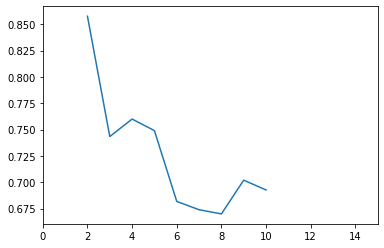

In [95]:
plt.plot(allclusters,allscore)
plt.xlim(0,15)

No handles with labels found to put in legend.


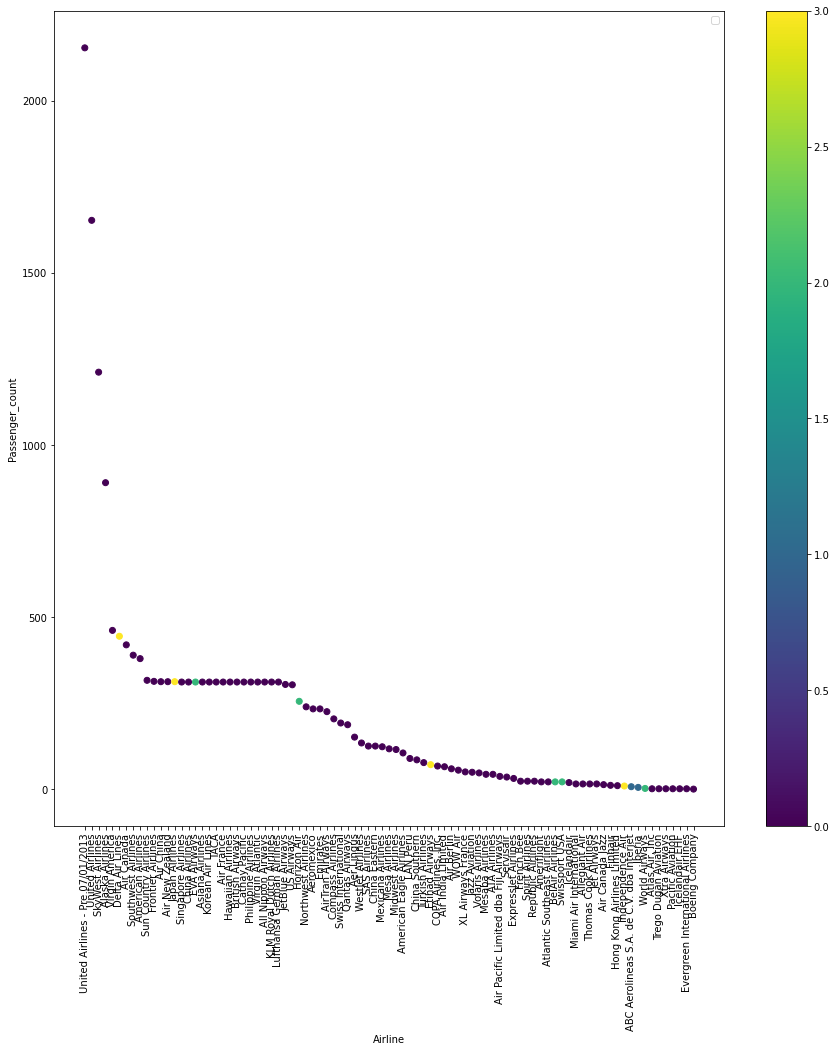

In [96]:
plt.figure(figsize=(15,15))
plt.scatter(x1,y1,c=pred)
plt.ylabel('Passenger_count')
plt.xlabel('Airline')
plt.legend()
plt.colorbar()
plt.xticks(rotation=90)
plt.show()

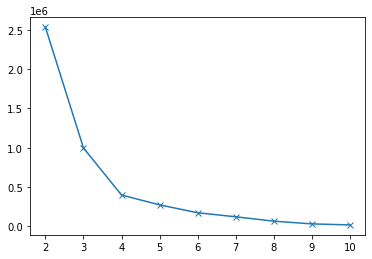

In [97]:
plt.plot(allclusters,sum_of_squared,marker='x')